# Project: Understanding the movie business

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we are going to investigate a Movie Data Set with data from 1960 to 2015 answering the following questions:

> 1- Genres evolution in amount of movies by year and revenue generated by year.

> 2- Variables that explain the revenue such as budget, votes and popularity

<a id='wrangling'></a>
## Data Wrangling


In [1]:
# importing the libraries to be use in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline


In [2]:
# reading the data set and using the parse_dates parameter to store the date column with datetime data type
# in this way we avoid to convert the data type later if we need to use it
df = pd.read_csv('tmdb-movies.csv' , parse_dates = ['release_date'] )

In [3]:
# in order to simplify the data set we drop the columns that are not useful for the data analysis
# seeing that we have two budgets and two revenues, we consider that adjusted to 2010 for the analysis.

to_drop = (['id','imdb_id' , 'homepage' , 'director' , 'tagline' , 'keywords' , 'overview' ,
            'production_companies' , 'cast' , 'budget' , 'revenue'])

df.drop(to_drop , axis = 1 , inplace = True)

In [4]:
# checking for any missing value in the columns

df.isna().sum()

popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [5]:
# checking the Nan values associated with genres

df[df.genres.isnull()]

popularity                                     original_title  runtime  \
424      0.244648                                     Belli di papÃ       100   
620      0.129696                                 All Hallows' Eve 2       90   
997      0.330431               Star Wars Rebels: Spark of Rebellion       44   
1712     0.302095                                  Prayers for Bobby       88   
1897     0.020701             Jonas Brothers: The Concert Experience       76   
2370     0.081892                                    Freshman Father        0   
2376     0.068411                      Doctor Who: A Christmas Carol       62   
2853     0.130018                                          Vizontele      110   
3279     0.145331                                      ì•„ê¸°ì™€ ë‚˜       96   
4547     0.520520  London 2012 Olympic Opening Ceremony: Isles of...      220   
4732     0.235911                                      The Scapegoat      100   
4797     0.167501                            Doctor Who: The Snowmen       60   
4890     0.083202                         Cousin Ben Troop Screening        2   
5830     0.248944                 Doctor Who: The Time of the Doctor       60   
5934     0.067433                                       Prada: Candy        3   
6043     0.039080                                     Bombay Talkies      127   
6530     0.092724                                        Saw Rebirth        6   
8234     0.028874                                    Viaggi di nozze      103   
8614     0.273934                         T2 3-D: Battle Across Time       12   
8878     0.038045                    Mom's Got a Date With a Vampire       85   
9307     0.094652                                          Goldeneye      105   
9799     0.175008                                        The Amputee        5   
10659    0.344172                      The Party at Kitty and Stud's       71   

      genres release_date  vote_count  vote_average  release_year  \
424      NaN   2015-10-29          21           6.1          2015   
620      NaN   2015-10-06          13           5.0          2015   
997      NaN   2014-10-03          13           6.8          2014   
1712     NaN   2009-02-27          57           7.4          2009   
1897     NaN   2009-02-27          11           7.0          2009   
2370     NaN   2010-06-05          12           5.8          2010   
2376     NaN   2010-12-25          11           7.7          2010   
2853     NaN   2001-02-02          12           7.2          2001   
3279     NaN   2008-08-13          11           6.1          2008   
4547     NaN   2012-07-27          12           8.3          2012   
4732     NaN   2012-09-09          12           6.2          2012   
4797     NaN   2012-12-25          10           7.8          2012   
4890     NaN   2012-01-01          14           7.0          2012   
5830     NaN   2013-12-25          26           8.5          2013   
5934     NaN   2013-03-25          27           6.9          2013   
6043     NaN   2013-05-03          12           5.9          2013   
6530     NaN   2005-10-24          24           5.9          2005   
8234     NaN   1995-12-15          44           6.7          1995   
8614     NaN   1996-01-01          14           6.7          1996   
8878     NaN   2000-10-13          16           5.4          2000   
9307     NaN   1989-08-26          10           5.3          1989   
9799     NaN   1974-01-01          11           5.0          1974   
10659    NaN   2070-02-10          10           3.0          1970   

        budget_adj  revenue_adj  
424        0.00000          0.0  
620        0.00000          0.0  
997        0.00000          0.0  
1712       0.00000          0.0  
1897       0.00000          0.0  
2370       0.00000          0.0  
2376       0.00000          0.0  
2853       0.00000          0.0  
3279       0.00000          0.0  
4547       0.00000          0.0  
4732       0.00000          0.0

In [6]:
# seeing that the Nan values are not too many and the variables that are relevant for the analysis are 0 (revenue and budget)
# we drop de nan values
df = df.dropna()


In [7]:
# considering that we have a different genres for a movie we have to get a list with 
#the unique genres to work with it in the future

df_columns=df['genres'].str.split('|', expand = True)
genres = list(set(list(set(df_columns[0].unique()))+list(set(df_columns[1].unique()))+list(set(df_columns[2].unique()))
+list(set(df_columns[3].unique()))+list(set(df_columns[4].unique()))))
genres.remove(None)


In [8]:
# creating years list to use in the plotting

years_list = df['release_year']

years = list(set(years_list))


In [9]:
#working with movies where its budget and revenue are greater than 0 in order to have better insights about correlation 
#between budget and revenue
df=df[df['budget_adj']>0]
df=df[df['revenue_adj']>0]
df=df[df['runtime']>0]

<a id='eda'></a>
## Exploratory Data Analysis


### Understanding the data

In [10]:
# first we get a superficial description of the data set
df.describe()

popularity      runtime   vote_count  vote_average  release_year  \
count  3855.000000  3855.000000  3855.000000    3855.00000   3855.000000   
mean      1.191400   109.215824   527.611933       6.16786   2001.263294   
std       1.475002    19.922166   879.868374       0.79504     11.281989   
min       0.001117    15.000000    10.000000       2.20000   1960.000000   
25%       0.462448    95.000000    71.000000       5.70000   1995.000000   
50%       0.797298   106.000000   204.000000       6.20000   2004.000000   
75%       1.368245   119.000000   580.000000       6.70000   2010.000000   
max      32.985763   338.000000  9767.000000       8.40000   2015.000000   

         budget_adj   revenue_adj  
count  3.855000e+03  3.855000e+03  
mean   4.423630e+07  1.370294e+08  
std    4.480403e+07  2.160944e+08  
min    9.693980e-01  2.370705e+00  
25%    1.309053e+07  1.834123e+07  
50%    3.001558e+07  6.171861e+07  
75%    6.061307e+07  1.632401e+08  
max    4.250000e+08  2.827124e+09

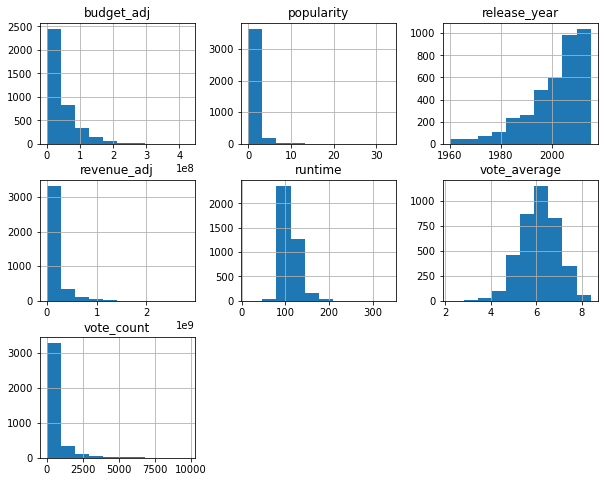

In [11]:
df.hist(figsize=(10,8));

From the histograms we can infere that there are outliers in revenue_adj , budget_adj , run time, popularity and vote_count so our data is skewed . Vote_average has a normal distribution and release_year has a positive tendency through the years which means that there're more movies released the last years

In [12]:
# correlation between budget and revenue
fig = px.scatter(df , x = 'budget_adj', y = 'revenue_adj')
fig.update_layout(title = {'text' : 'Correlation between Budget and Revenue', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
fig.show();

Seem to be a correlation between budget and revenue but not so strong

In [13]:
# correlation between popularity and revenue
fig = px.scatter(df , x = 'popularity', y = 'revenue_adj')
fig.update_layout(title = {'text' : 'Correlation between Popularity and Revenue', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
fig.show();


It seems that popularity and revenue are  correlated

In [14]:
# correlation between year and revenue
fig = px.scatter(df , x = 'runtime', y = 'revenue_adj')
fig.update_layout(title = {'text' : 'Correlation between Runtime and Revenue', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
fig.show();

There is no correlation between runtime and revenue_adj

In [15]:
# correlation between vote_count and revenue_adj
fig = px.scatter(df , x = 'vote_count', y = 'revenue_adj')
fig.update_layout(title = {'text' : 'Correlation between Votes count and Revenue', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
fig.show();


In [16]:
# correlation between vote_average and revenue_adj
fig = px.scatter(df , x = 'vote_average', y = 'revenue_adj')
fig.update_layout(title = {'text' : 'Correlation between Vote Average and Revenue', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
fig.show();


Seems that the more vote_average a movie has the more revenue it gets

## Question : Budget is associated with Revenue?

Average popularity has a positive tendency that has strengthen since 2010

In [17]:
#  average revenue evolution in the industry

df_ = df.groupby('release_year').revenue_adj.mean()

fig = px.line(df_ , x = years, y = 'revenue_adj' , labels = { 'x' : 'year' , 'revenue_adj': 'average revenue $USD' })
fig.update_layout(title = {'text' : 'Average Revenue Evolution', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})
df_ = df.groupby('release_year').original_title.count()
fig.show()


In [18]:
#  average revenue evolution in the industry

df_ = df.groupby('release_year').original_title.count()

fig = px.line(df_ , x = years, y = 'original_title' , labels = { 'x' : 'year' , 'original_title': '# movies' })
fig.update_layout(title = {'text' : 'Movies released by year', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})

fig.show();

The average revenue each year has been decreasing through the years because the amount of movies each year are released have increase exponentially 

In [19]:
#  revenue evolution in the industry
df_ = df.groupby('release_year').sum()
fig = px.line(df_, x = years , y = ['budget_adj' , 'revenue_adj'])
fig.update_layout(title = {'text' : 'Budget vs Revenue evolution', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'},
                 xaxis_title = 'years' , yaxis_title = '$ USD' , legend_title = 'Variable')
fig.update_traces(mode = 'lines+markers')
fig.show();

Seems that movie get better revenue not just because of budget, in the graph we can see that between 2000 and 2015 the budget has a flat pattern while revenue has a upward slope resulting in that they are not direcly correlated

### Question : What is the most popular genre year to year?

In [20]:
# finding how many times in total during the period 1960 to 2015  each genre appear

def genre_count(lista):
    quant = []
    for i in range(len(lista)):
        data = {'quantity':df['genres'].str.contains(lista[i]).sum()}
        quant.append(data)
    return pd.DataFrame(quant , index = lista)    

In [21]:
# plotting the amount of movies by gender in the period
df_ = genre_count(genres)

fig = px.bar(df_ , x = genres, y = 'quantity' , labels = { 'x' : 'genre' , 'quantity': '# of Movies' })
fig.update_layout(title = {'text' : 'Total number of movies by gender from 1960 to 2015', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})

fig.show();

The genres that appears the most from 1960 to 2015 are to be Drama, Comedy Thriller and Action

In [22]:
# share of genres in the movies along the period
sth = {}
for i in range(len(genres)):
     sth[genres[i]] = df['genres'].str.contains(genres[i]).groupby(df['release_year']).sum().astype(int)
aux = pd.DataFrame(sth)

fig = px.bar(aux , x = years, y = genres)
fig.update_layout(title = {'text' : 'Movie releases by genre from 1960 to 2015', 'y' : 0.95, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'},
                 xaxis_title = 'years' , yaxis_title = '# Movies' , legend_title = 'Genre')
fig.show();

Horror and science fiction movies gain share since 2000s
Drama, thriller, comedy and action are the ones that grow the most during the years

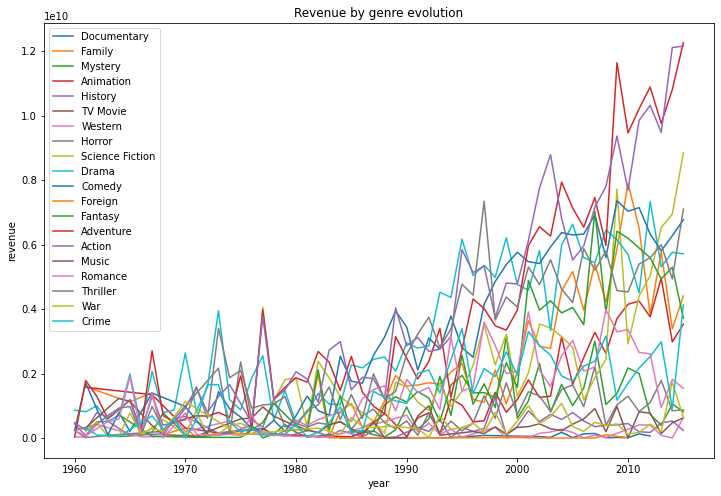

In [23]:
plt.figure(figsize=(12,8))
for i in range(len(genres)):
    plt.plot(df[df['genres'].str.contains(genres[i])].groupby(df['release_year']).revenue_adj.sum() , label = genres[i])
plt.xlabel('year')
plt.ylabel('revenue')
plt.title('Revenue by genre evolution')
plt.legend();

Seeing the graph we can say that Drama , Action and Comedy are the top performers in terms of revenue in the last decade

In [24]:
#  revenue evolution in the industry
df_ = df.groupby('release_year').sum()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=years, y=df_['revenue_adj'], name="Revenue"),
    secondary_y=False,)

fig.add_trace(go.Scatter(x=years, y=df_['vote_count'], name="Vote Count"),
    secondary_y=True,)
    
fig.update_layout(title = {'text' :"Revenue vs Votes evolution",'y' : 0.85, 'x': 0.5 , 'xanchor':'center' , 'yanchor' : 'top'})

# Set x-axis title
fig.update_xaxes(title_text="year")

# Set y-axes titles
fig.update_yaxes(title_text="Revenue in $ USD", secondary_y=False)
fig.update_yaxes(title_text="# Votes", secondary_y=True)

fig.show();

The number of votes are correlated with the revenue

<a id='conclusions'></a>
## Conclusions

Having analyzed the data we could state that revenue is not clearly associated with the budget or investment on a movie , this probably depends also in the countries that has being released, how many stars are in the cast and how recognized the director is. 

Through the years the average of revenue per movie has been decreasing because there are a lot of new movies each year, also people are more aware of the movies and that can be seeing in the evolution of vote count. 

In terms of genres, there are clearly 4 winners which are Drama, Action, Comedy and Thriller. Just considering Action genre we could say that the revenue is not associated directly with the amount of movies released (just considering this analysis). 

There is plenty of room for improvement such as understanding if the special effects or the quality of the movie itself in terms of footage affect the revenue.
## Limitations
Regarding the limitations, as I mentioned above , the information is not sufficient to prove the findings, when it comes to analyze the genres we have no clear idea which is the main genre of the movie which is a problem, for example. Apart from that, the missing values for some movies reduced considerably the amount of data (almost half of it had an issue regarding to missing information) with this the results could be influenced not being precise. What is more, if we think in formulate a predictive model about revenue and movies with the information provided is virtually impossible.

Finally, adding information that describe the movie, such as special effects, country of footage, stars, animation or quality of the image, for example, could help us to explain the difference in revenue within a certain genre.